# Statistical Methods in AI (CSE/ECE 471) - Spring-2020
#  Assignment-2 / **Q6** / Topic: Clustering
# Submitted By: VENUGOPAL REDDY MEKA
# Roll No: 2019900065

In [91]:
from sklearn.datasets import load_files
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style


style.use('ggplot')
# use matplotlib inline for Jupyter notebook
%matplotlib inline

In [92]:
DATA_DIR = "./Datasets/Question-6"
data = load_files(DATA_DIR, encoding="utf-8", decode_error="replace")
df = pd.DataFrame(list(zip(data['data'], data['target'])), columns=['text', 'label'])

In [93]:
df.head()

,text,label
0,Labour trio 'had vote-rig factory'\n\nThree La...,0
1,MPs to debate 'euthanasia laws'\n\nMPs are pre...,0
2,Corry backs skipper Robinson\n\nEngland forwar...,0
3,Consumers 'snub portable video'\n\nConsumers w...,0
4,Beer giant swallows Russian firm\n\nBrewing gi...,0


In [94]:
labels = list()
files = os.listdir(DATA_DIR + "/dataset")
for file in files:
    file_name = file.split(".")[0]
    label = file_name.split("_")[1]
    labels.append(label)

In [95]:
labels = np.array(labels)

In [96]:
labels.shape

(602,)

### Class Cluster

In [97]:
class Cluster:
    """

    """

    def __init__(self, k=5, tolerance=0.0001, max_iterations=500):
        """

        :param k:
        :param tolerance:
        :param max_iterations:
        """
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations
        self.centroids = {}
        self.classes = {}
        self.labels = None

    @staticmethod
    def load_data(data_dir):
        """
        Loads the text data from files
        :return:
        """
        data = load_files(data_dir, encoding="utf-8", decode_error="replace")
        df = pd.DataFrame(list(zip(data['data'], data['target'])), columns=['text', 'label'])
        tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2),
                                stop_words='english')
        return tfidf.fit_transform(df.text).toarray()

    @staticmethod
    def load_labels(data_dir):
        """
        Loads the labels from the file names
        :return:
        """
        labels = list()
        files = os.listdir(data_dir)
        for file in files:
            file_name = file.split(".")[0]
            label = file_name.split("_")[1]
            labels.append(label)

        return np.array(labels)

    def cluster(self, data_dir):

        self.centroids = {}
        data = self.load_data(data_dir)

        # initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
        for i in range(self.k):
            self.centroids[i] = data[i]

        # begin iterations
        for i in range(self.max_iterations):
            self.classes = {}
            cluster_labels = []
            for j in range(self.k):
                self.classes[j] = []

            # find the distance between the point and cluster; choose the nearest centroid
            for features in data:
                distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classes[classification].append(features)
                cluster_labels.append(classification + 1)

            previous = dict(self.centroids)

            # average the cluster datapoints to re-calculate the centroids
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = previous[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid - original_centroid) * 100.0) > self.tolerance:
                    optimized = False

            if optimized:
                break

        return cluster_labels

### Perform clustering using Cluster class

[1, 2, 3, 4, 5, 3, 3, 5, 2, 4, 5, 5, 4, 4, 1, 3, 1, 1, 2, 2, 4, 3, 3, 4, 5, 3, 4, 5, 4, 4, 4, 4, 4, 3, 3, 5, 5, 3, 4, 1, 2, 4, 3, 3, 5, 2, 3, 3, 5, 3, 5, 3, 3, 5, 1, 3, 2, 3, 5, 5, 4, 2, 1, 5, 3, 3, 5, 4, 2, 2, 4, 3, 1, 1, 3, 3, 4, 3, 4, 4, 3, 4, 5, 4, 5, 2, 1, 3, 5, 5, 3, 3, 3, 5, 4, 3, 3, 1, 3, 2, 2, 3, 1, 5, 5, 4, 5, 4, 5, 1, 3, 2, 2, 5, 2, 3, 3, 4, 2, 1, 1, 4, 5, 3, 3, 5, 1, 3, 3, 4, 3, 4, 4, 3, 2, 3, 2, 1, 3, 1, 5, 2, 5, 3, 3, 3, 5, 2, 4, 4, 2, 3, 5, 3, 5, 1, 3, 1, 1, 5, 5, 2, 3, 5, 2, 2, 3, 2, 4, 3, 3, 4, 3, 3, 3, 3, 3, 1, 4, 1, 3, 1, 4, 4, 3, 4, 4, 3, 4, 3, 1, 4, 2, 5, 4, 3, 3, 3, 3, 1, 3, 3, 5, 3, 3, 3, 4, 4, 1, 3, 4, 3, 4, 5, 2, 3, 3, 2, 3, 5, 3, 4, 4, 3, 4, 5, 1, 2, 1, 3, 3, 1, 5, 2, 4, 4, 4, 2, 3, 3, 3, 5, 5, 5, 3, 2, 5, 3, 5, 5, 5, 3, 4, 5, 5, 4, 3, 3, 3, 5, 2, 3, 5, 3, 3, 4, 2, 3, 4, 2, 1, 3, 4, 4, 4, 5, 2, 1, 3, 4, 4, 5, 4, 4, 2, 4, 2, 2, 2, 3, 5, 3, 2, 5, 1, 2, 2, 3, 2, 2, 4, 3, 5, 3, 5, 3, 5, 3, 2, 3, 5, 5, 3, 5, 2, 3, 5, 3, 3, 2, 3, 4, 4, 2, 3, 2, 4, 5, 3, 5, 3, 2, 4, 

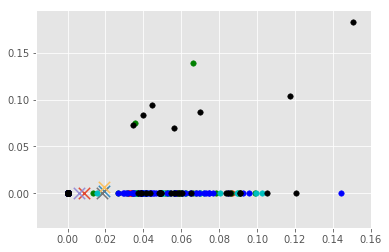

In [98]:
data_dir = "./Datasets/Question-6"
cl = Cluster()
cluster_labels = cl.cluster(data_dir)
print(cluster_labels)

# Plotting starts here
colors = 10 * ["r", "g", "c", "b", "k"]

for centroid in cl.centroids:
    plt.scatter(cl.centroids[centroid][0], cl.centroids[centroid][1], s=130, marker="x")

for classification in cl.classes:
    color = colors[classification]
    for features in cl.classes[classification]:
        plt.scatter(features[0], features[1], color=color, s=30)

mpld3.show()

### Clustering using sklean KMeans (for comparison only)

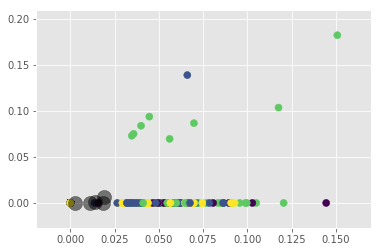

In [99]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
X = cl.load_data(data_dir)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()